<a href="https://colab.research.google.com/github/caretta24/Ahmetsengul/blob/master/ML_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
len(X)

150

In [6]:
len(y)

150

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [8]:
X_train.shape

(120, 4)

In [9]:
y_train.shape

(120,)

In [10]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [13]:
?xgb


In [11]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset

num_round = 20  # the number of training iterations

In [14]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

In [15]:
preds[:5]

array([[0.00702636, 0.9398774 , 0.05309621],
       [0.00330976, 0.00454916, 0.992141  ],
       [0.00330976, 0.00454916, 0.992141  ],
       [0.00466867, 0.9888749 , 0.00645646],
       [0.00330976, 0.00454916, 0.992141  ]], dtype=float32)

In [18]:
print(np.argmax(preds[5]))

1


In [19]:
from sklearn.metrics import precision_score

In [20]:
best_preds = np.asarray([np.argmax(line) for line in preds])
print ("Numpy array precision:", precision_score(y_test, best_preds, average='macro'))

Numpy array precision: 0.9363636363636364


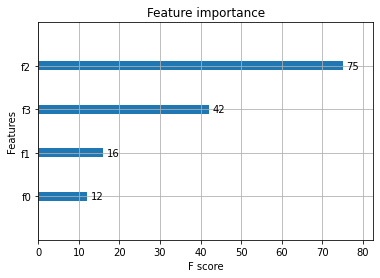

In [22]:
xgb.plot_importance(bst)
plt.show()

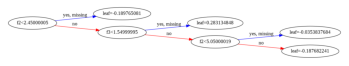

In [23]:
xgb.plot_tree(bst, num_trees=4, rankdir="LR")


In [24]:
fig = plt.gcf()
fig.set_size_inches(150, 100)

<Figure size 10800x7200 with 0 Axes>

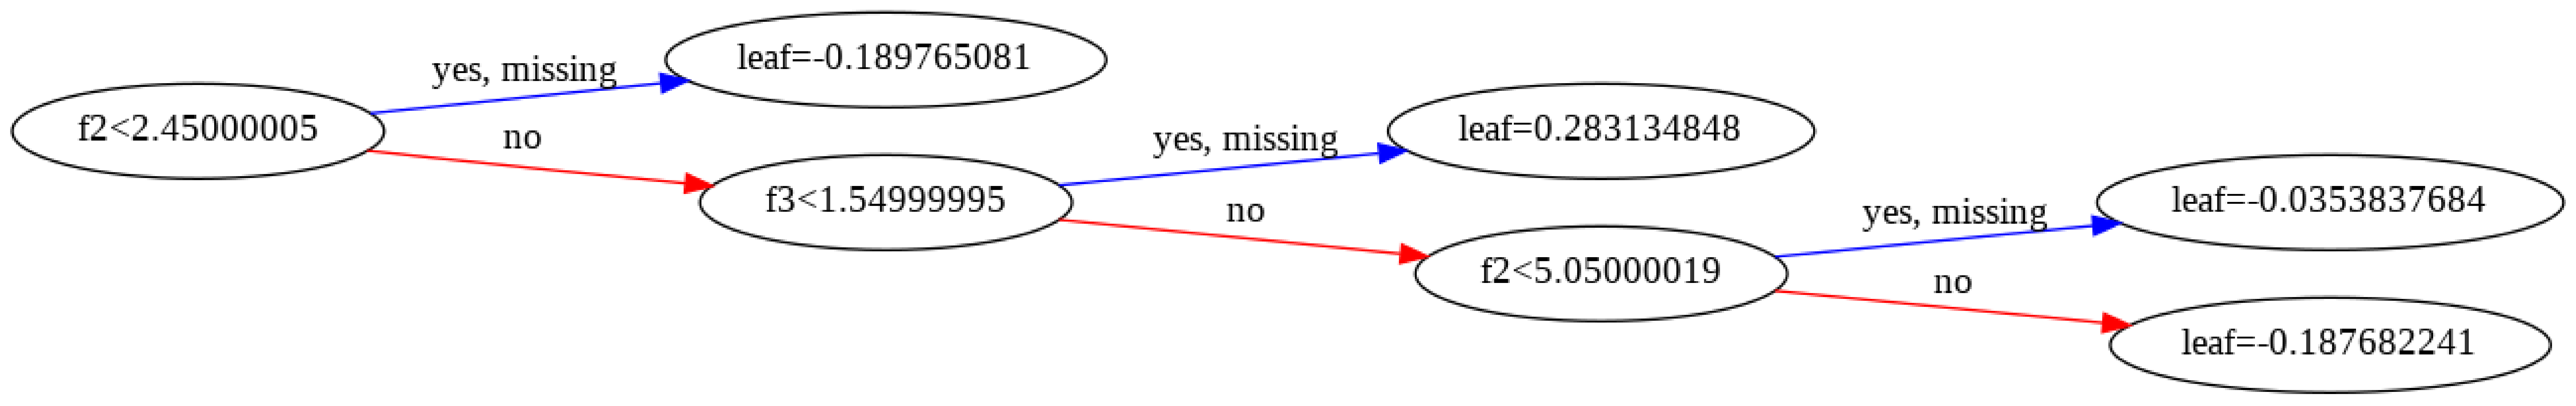

In [25]:
xgb.plot_tree(bst, num_trees=4, rankdir="LR")
fig = plt.gcf()
fig.set_size_inches(150, 100)

In [26]:
dtrain.feature_names

['f0', 'f1', 'f2', 'f3']

In [27]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(data=iris.target)

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

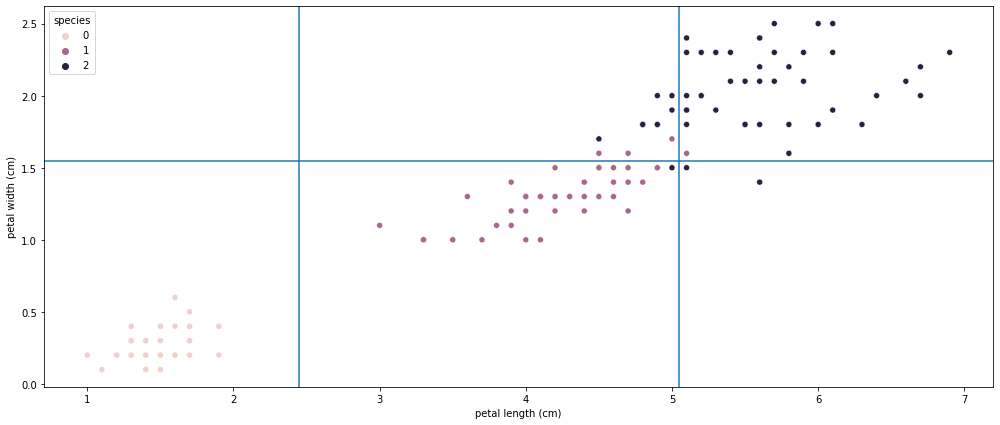

In [32]:
plt.figure(figsize=(17, 7))
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.axvline(2.45, 0, 1.0)
plt.axhline(1.55, 0, 1.0)
plt.axvline(5.05, 0, 1.0)
plt.show()